<a href="https://colab.research.google.com/github/hmyrcmn/deepLearningProjects/blob/main/Guided_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split


## Dataset
Let's load the .xlsx file.

📌 Use the read_excel() function of the Pandas library.

In [2]:
# Read the "date_fruit.xlsx" file
data=pd.read_excel("/content/date_fruit.xlsx")

data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


Next, we take a look at the dataset.

📌 Use the data.head() function.

📌 Use .shape attribute and .unique() methods.

In [3]:
# Use the head() function to display the first 5 rows of the data
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
# Print the shape of the data and classes
print(data.shape)
print(data['Class'].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


## Preprocessing

Now that we have a better understanding of our data, let’s split the dataset into features and labels.

📌 Create X and y datasets using .drop() and .loc() methods

In [5]:
# Create the features dataset

x=data.drop(['Class'],axis=1)
print("x:",x)
# Create the labels dataset
y=data.loc[:,"Class"]
print("y:",y)

x:        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0      0.9947       424428  0.7

### Feature scaling

Having features in different units or ranges can be problematic in deep learning. We need to scale all of the values between the 0 and 1 range.

📌 Use the minmax_scale() function of the sklearn library.


In [6]:
# Normalize the features dataset and assign it to a variable
x_scaled=minmax_scale(x)

# Create a DataFrame using the new variable
x=pd.DataFrame(x_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.465773,0.533393,0.400815,0.621454,0.578907,0.663606,0.882463,0.470201,0.624019,0.000720,...,0.215776,0.021833,0.030355,0.031264,0.769330,0.797879,0.792768,0.524396,0.360048,0.390293
894,0.668908,0.922547,0.585486,0.718768,0.640415,0.806960,0.684080,0.698311,0.457110,0.000909,...,0.385840,0.069603,0.078511,0.072954,0.711430,0.767717,0.783525,0.489149,0.297087,0.277447
895,0.463801,0.534115,0.463625,0.567071,0.713980,0.662076,0.969527,0.461528,0.615586,0.001217,...,0.314359,0.023207,0.035871,0.030441,0.797356,0.793251,0.802894,0.447747,0.324174,0.362618
896,0.435542,0.523343,0.428810,0.575194,0.675366,0.639781,0.769900,0.447973,0.532422,0.001042,...,0.378900,0.039599,0.042970,0.033852,0.762427,0.774730,0.777411,0.557500,0.402805,0.452067


Then, we print the X data again so we can see the difference.

📌 Use the .head() method.

In [7]:
# Print the newly created DataFrame
x.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


Our features are ready for training. Now, it's time to prepare the labels.

📌 Print y to take a look at it.

In [8]:
# Print the y array
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

Artificial intelligence algorithms can't use string data when training a model because no mathematical operations can be performed on them.

📌 Use the LabelEncoder of the sklearn library to converting strings to integers.

In [9]:
# Create an LabelEncoder object.
encoder=LabelEncoder()
#benhri converted show with :0   sogay:1

# Convert string classes to integers using fit_transform() method
y=encoder.fit_transform(y)


Then, we print y to check the result.

In [10]:
# Print the y array
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Splitting

Great, that worked out as we wanted it. Now, we split the dataset into training, validation and test datasets. In general, the ratio for splitting is 80% for training, 10% for validation and 10% for test sets.

📌 Use train_test_split function of the sklearn library.


In [11]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
x_train,x_temp,y_train,y_temp=train_test_split(x,y,train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,train_size=0.5)

Let's print the total length of the initial dataset and lengths of the newly created datasets to check our results.

📌 Use the len() function to print the lengths.

In [12]:
# Print the lengths of the X, X_train, X_val and X_test
print("x length:", len(x), "x_train length:", len(x_train), "x_val length:", len(x_val), "x_test length:", len(x_test))


x length: 898 x_train length: 718 x_val length: 90 x_test length: 90


## Constructing the neural network
And with that, our data is ready to be used in a model. We can move on to the exciting part: constructing a deep learning model. We’ll use TensorFlow for this. To speed up the training time, activate the GPU of Google Colab.

📌 Import TensorFlow

In [13]:
# Import TensorFlow
import tensorflow as tf

Let's start by creating a model object using Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [14]:
# Create a model object
model=tf.keras.Sequential()

### Input layer
First, we construct an input layer and assign it to a variable. The first argument is the number of nodes we want in that hidden layer. Only for the input layer, we have to set the input_shape argument which is the number of columns, in this case, 34. For the activation function, we specify “ReLU”.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [15]:
from keras.src.engine import input_layer
# Create an input layer
#relu  is an activation fonk
input_layer=tf.keras.layers.Dense(4096,input_shape=(34,),activation="relu")

# Add input layer to model object
model.add(input_layer)

### Hidden layers
Next, we need to add the hidden layers. We'll add 4 hidden layers each with 4096 nodes. Again, we specify ReLU as the activation functions and 0.5 dropouts.

📌 Use tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.


In [22]:
# the suggest   chose the layers num acording to computer 2 and 2^
# 0.5 dropout bloks to oversfitting
# Add the first hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation="relu"))
# Add 0.5 dropout

model.add(tf.keras.layers.Dropout(0.5))
# Add the second hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation="relu"))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))


# Add the third hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation="relu"))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))


# Add the fourth hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation="relu"))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))


### Output layer
As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 7 in our case. We'll use the softmax activation function in the output layer.

In [23]:
# Add the out
model.add(tf.keras.layers.Dense(7,activation="softmax"))
#softmax alg: convert to each value between 0 and 1

### Optimizer
Now we have the structure of our model. To configure the model for training, we'll use the *.compile()* method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [26]:
# Compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
#this alg more effective according other way alg and giveloss parameter

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

In [29]:
# Train the model for 100 epochs
results=model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
23/23 [==============================] - 9s 43ms/step - loss: 1.8871 - accuracy: 0.2493 - val_loss: 1.2635 - val_accuracy: 0.4444
Epoch 2/100
23/23 [==============================] - 1s 32ms/step - loss: 1.1241 - accuracy: 0.5209 - val_loss: 1.3121 - val_accuracy: 0.6111
Epoch 3/100
23/23 [==============================] - 1s 32ms/step - loss: 0.9337 - accuracy: 0.6240 - val_loss: 0.7263 - val_accuracy: 0.8000
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 0.9816 - accuracy: 0.7256 - val_loss: 0.6381 - val_accuracy: 0.6778
Epoch 5/100
23/23 [==============================] - 1s 31ms/step - loss: 0.9603 - accuracy: 0.6309 - val_loss: 0.7754 - val_accuracy: 0.6556
Epoch 6/100
23/23 [==============================] - 1s 31ms/step - loss: 0.7665 - accuracy: 0.6811 - val_loss: 0.5348 - val_accuracy: 0.7222
Epoch 7/100
23/23 [==============================] - 1s 31ms/step - loss: 0.6396 - accuracy: 0.7228 - val_loss: 0.7423 - val_accuracy: 0.7111
Epoch 

### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.

In [31]:
print(results.history)


{'loss': [1.8871195316314697, 1.124118447303772, 0.9337092638015747, 0.9815889000892639, 0.9602569937705994, 0.7665087580680847, 0.6396390795707703, 0.6682449579238892, 0.6405426263809204, 0.6734125018119812, 0.5332049131393433, 0.6092911958694458, 0.5548684597015381, 0.48162829875946045, 0.5619187355041504, 0.5986975431442261, 0.4652926027774811, 0.516359269618988, 0.41583502292633057, 0.4331586956977844, 0.7603797912597656, 0.535014271736145, 0.7622792720794678, 0.4820195734500885, 0.5033621788024902, 0.4228762686252594, 0.5293481945991516, 0.5488047003746033, 0.47341859340667725, 0.44879308342933655, 0.4325115382671356, 0.4467022120952606, 0.4405757784843445, 0.42716488242149353, 0.3983966112136841, 0.4287280738353729, 0.45856374502182007, 0.4811861217021942, 0.5019804239273071, 0.5189199447631836, 0.5314105153083801, 0.5248153209686279, 0.47077232599258423, 0.4344290792942047, 0.4921562969684601, 0.453255832195282, 0.4736832082271576, 0.40830931067466736, 0.4545391798019409, 0.4200

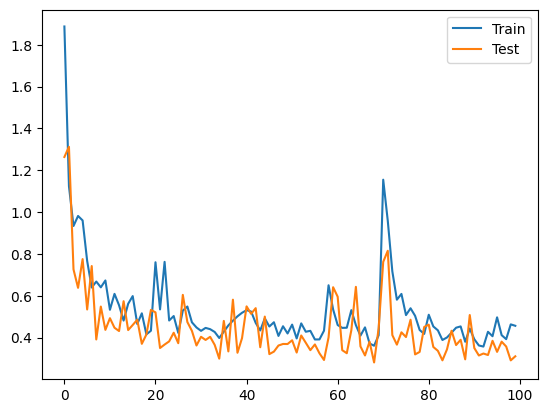

In [32]:
# Plot the the training loss
plt.plot(results.history["loss"],label="Train")
# Plot the the validation loss
plt.plot(results.history["val_loss"],label="Test")
# Name the x and y axises
plt.ylabel="Loss"
plt.xlabel="Epochs"
# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Finally, we are going to use the test dataset we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter

In [33]:
# Evaluate the performance
test_result=model.test_on_batch(x_test,y_test)
# Print the result
print(test_result)
# the accurasy: 0.8
# the loss:0.3

[0.3635285198688507, 0.800000011920929]
